# Chapter 11: Support vector machine (SVM)

### 11.1. Preparation of data
> ###### 11.1.1. Features engineering
> ###### 11.1.2. Standardization

### 11.2. Support vector classifier (SVC)
> ###### 11.2.1. Intuition about how works an SVC
> ###### 11.2.2. Implementation of the model
> ###### 11.2.3. Predictions and backtest

### 11.3. Support vector regressor (SVR)
> ###### 11.3.1. Intuition about how works an SVR
> ###### 11.3.2. Implementation of the model
> ###### 11.3.3. Predictions and backtest

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from Backtest import *

### 11.1.1. Features enginneering

In [31]:
# Import EURUSD data
df = yf.download("GOOG", end="2021-01-01")[["Adj Close"]].pct_change(1)
df.columns = ["returns"]

# Features engeeniring
df["returns t-1"] = df[["returns"]].shift(1)

# Mean of returns
df["mean returns 15"] = df[["returns"]].rolling(15).mean().shift(1)
df["mean returns 60"] = df[["returns"]].rolling(60).mean().shift(1)

# Volatility of returns
df["volatility returns 15"] = df[["returns"]].rolling(15).std().shift(1)
df["volatility returns 60"] = df[["returns"]].rolling(60).std().shift(1)

# For participants:  how to drop missing values

[*********************100%%**********************]  1 of 1 completed


In [34]:
# For participants: printing the first few rows of the data frame
print(df.head)

<bound method NDFrame.head of              returns  returns t-1  mean returns 15  mean returns 60  \
Date                                                                  
2004-11-15  0.015769    -0.005573         0.004556         0.010622   
2004-11-16 -0.066696     0.015769        -0.000181         0.009561   
2004-11-17 -0.000232    -0.066696        -0.002635         0.008281   
2004-11-18 -0.028754    -0.000232        -0.004180         0.008968   
2004-11-19  0.011102    -0.028754        -0.008724         0.008309   
...              ...          ...              ...              ...   
2020-12-24  0.003735     0.005152        -0.003550         0.002903   
2020-12-28  0.021416     0.003735        -0.003258         0.002962   
2020-12-29 -0.009780     0.021416        -0.001875         0.003086   
2020-12-30 -0.010917    -0.009780        -0.002216         0.003277   
2020-12-31  0.007105    -0.010917        -0.002910         0.002780   

            volatility returns 15  volatility 

In [23]:
# Percentage train set
# For participants: determining the split here!!!!

# Train set creation
X_train = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[:split]

y_train_reg = df[["returns"]].iloc[:split]

y_train_cla = np.round(df[["returns"]].iloc[:split]+0.5)


# Test set creation
X_test = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[split:]

y_test_reg = df[["returns"]].iloc[split:]
y_test_cla = np.round(df[["returns"]].iloc[split:]+0.5)

### 11.1.2. Standardization

In [24]:
# For participants: implement the standardization part

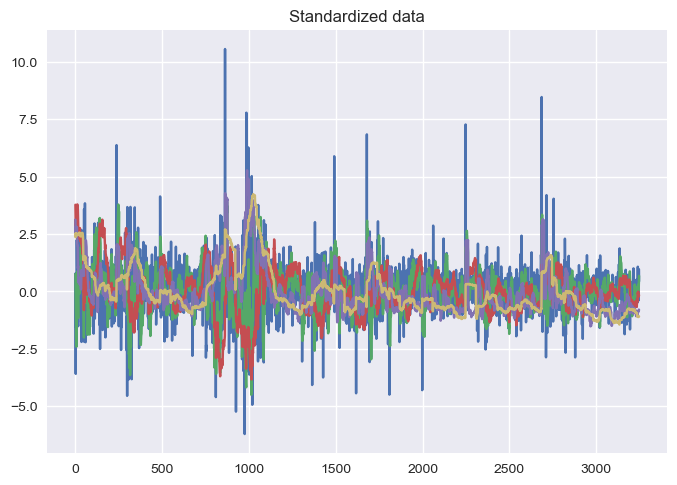

In [25]:
plt.plot(X_train_scaled)
plt.title("Standardized data")
plt.show()

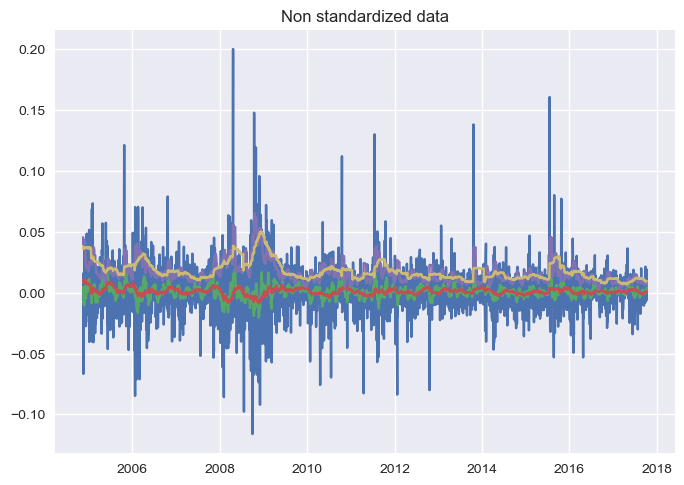

In [26]:
plt.plot(X_train)
plt.title("Non standardized data")
plt.show()

### 11.2.2. Implement an SVC

In [27]:
# For participants: Code to implement SVC part

SVC()

### 11.2.3. Predictions ans backtest

[*********************100%%**********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.249 	 Alpha: -20.76 %	     Sharpe: -0.571 	 Sortino: -0.041
  -----------------------------------------------------------------------------
    VaR: 5.46 %	 cVaR: 6.09 % 	     VaR/cVaR: 1.117 	 drawdown: 66.09 %
  -----------------------------------------------------------------------------


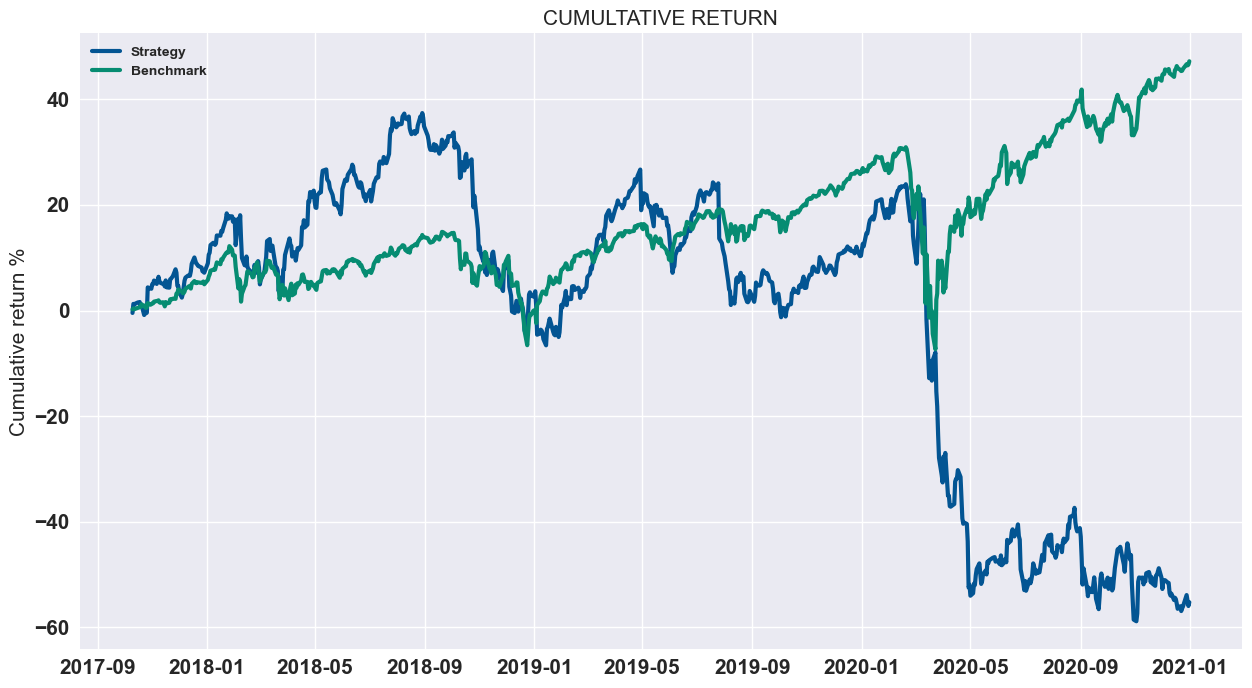

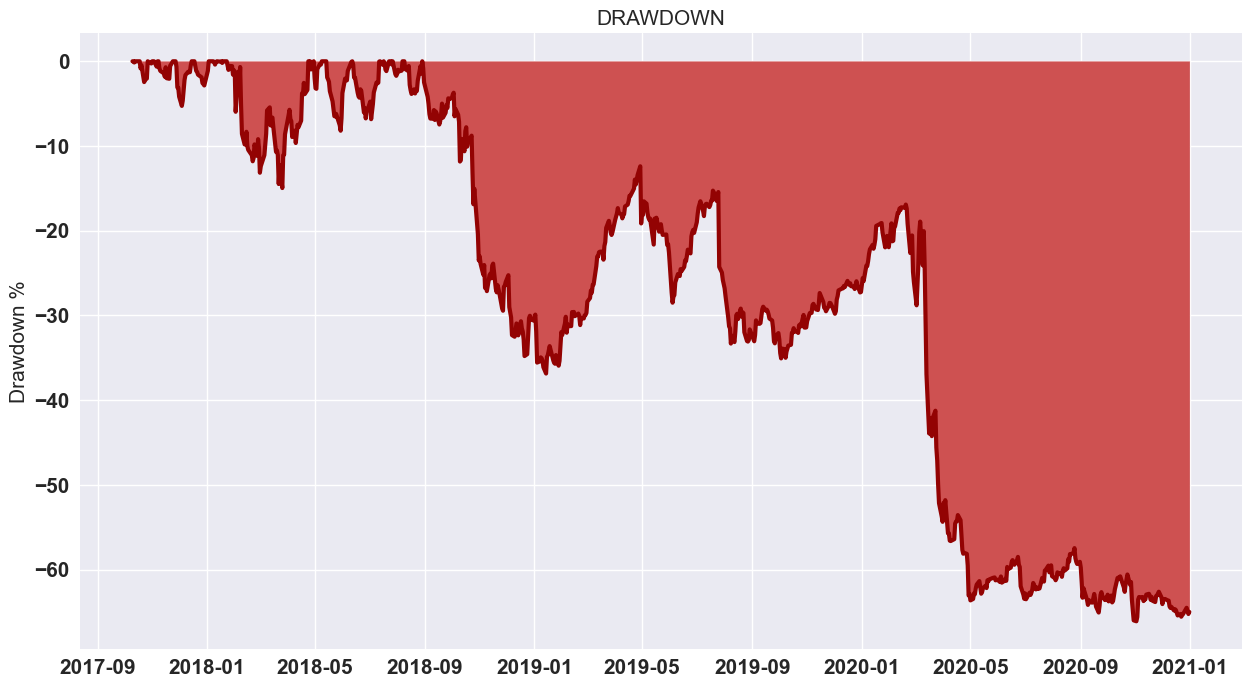

In [28]:
# Create predictions for the whole dataset
df["prediction"] = svc.predict(np.concatenate((X_train_scaled,X_test_scaled),
                                    axis=0))
df["prediction"] = np.where(df["prediction"]==0, -1, 1)

# Compute the strategy
df["strategy"] = df["prediction"] * df["returns"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:])

### 11.3.2. Implement an SVR

In [29]:
# Import the class
from sklearn.svm import SVR

# Initialize the class
lr = SVR()

# Fit the model
lr.fit(X_train_scaled, y_train_reg)

SVR()

### 11.3.3. Predictions and backtest

[*********************100%%**********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.787 	 Alpha: 2.15 %	     Sharpe: 0.455 	 Sortino: 0.037
  -----------------------------------------------------------------------------
    VaR: 3.53 %	 cVaR: 4.16 % 	     VaR/cVaR: 1.178 	 drawdown: 30.32 %
  -----------------------------------------------------------------------------


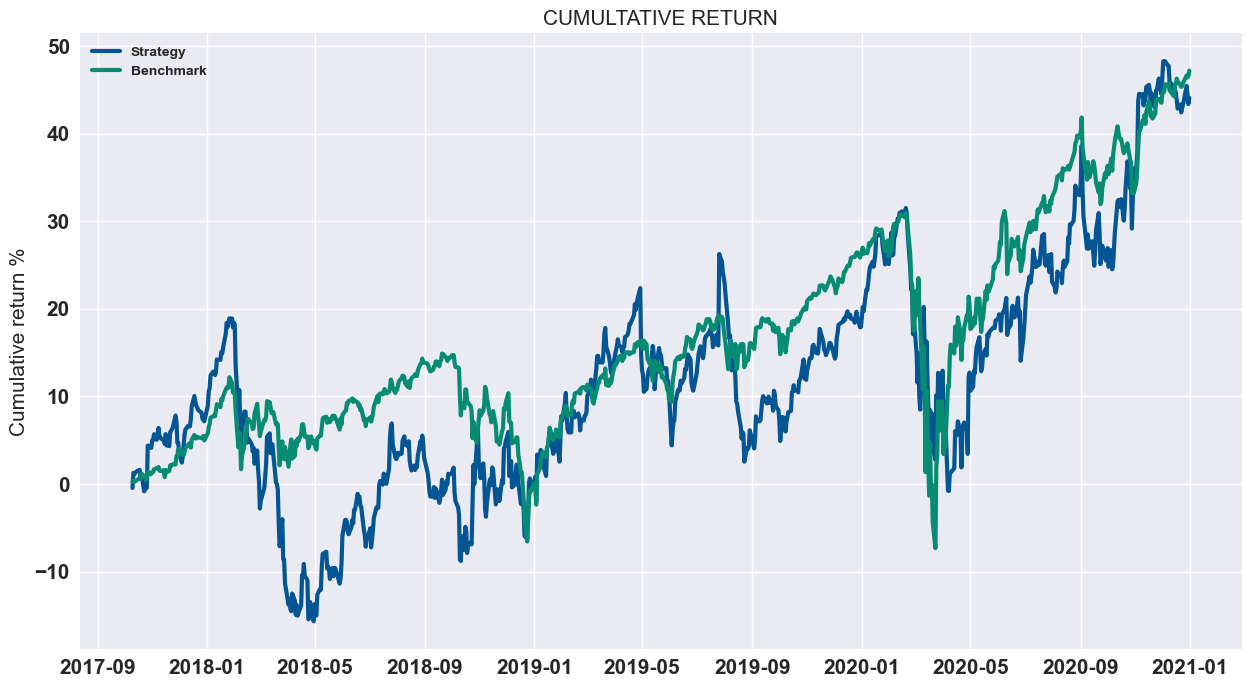

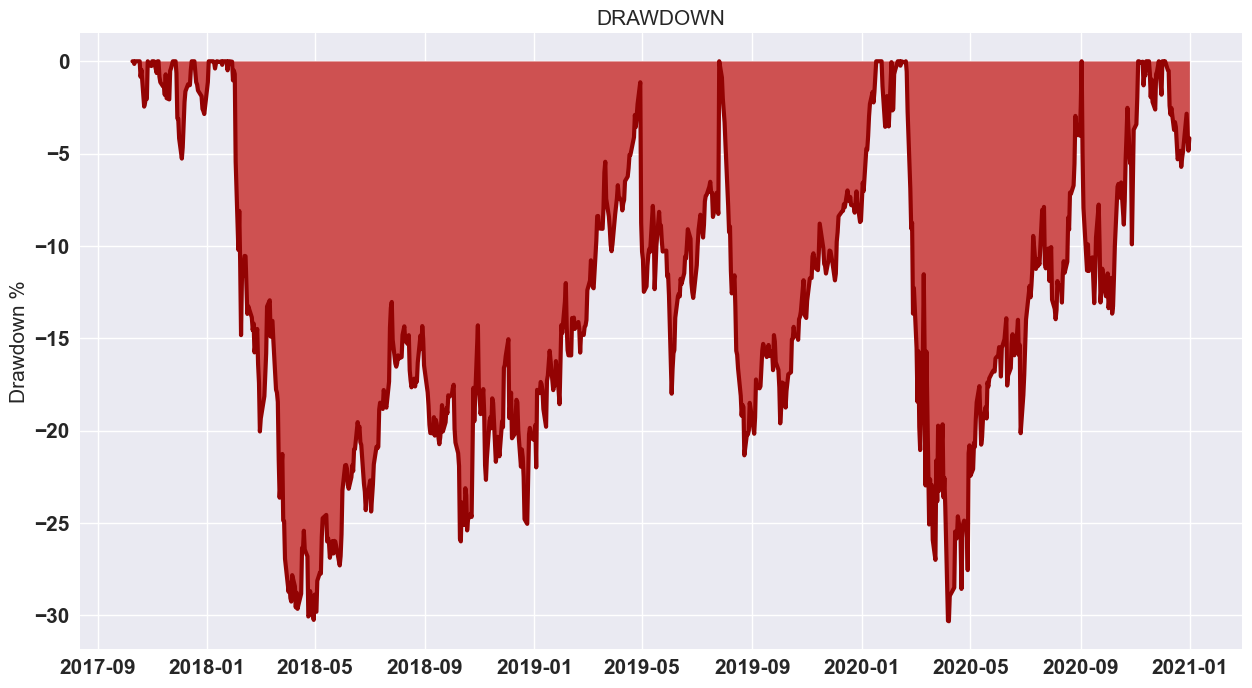

In [30]:
# Create predictions for the whole dataset
df["prediction"] = lr.predict(np.concatenate((X_train_scaled,X_test_scaled),
                                    axis=0))
# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["returns"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:])